In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xlrd
!pip install autoviz
!pip install dtale

In [ ]:
import math
import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from autoviz.AutoViz_Class import AutoViz_Class
import os
import cv2
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Property Dataset Project/Property_with_Feature_Engineering.csv',parse_dates=[18])
data.head()

property_id  location_id  \
0       347795            8   
1       482892           48   
2       555962           75   
3       562843         3821   
4       686990         3522   

                                                                                                                                                    page_url  \
0                                           https://www.zameen.com/Property/lahore_model_town_6_kanal_excellent_house_for_sale_in_model_town-347795-8-1.html   
1                                                                 https://www.zameen.com/Property/lahore_multan_road_1_kanal_house_for_sale-482892-48-1.html   
2                                                                   https://www.zameen.com/Property/eden_eden_avenue_9_marla_house_for_sale-555962-75-1.html   
3                https://www.zameen.com/Property/gulberg_2_gulberg_2_block_s_semi_commercial_house_for_sale_near_mm_alam_price_negotiable-562843-3821-1.html   
4  https://www.zameen.com/Property/allama_iqbal_town_allama_iqbal_town_raza_block_11_marla_house_for_sale_at_best_location_with_noc_ready-686990-3522-1.html   

  property_type      price  price_bin           location    city  \
0         House  220000000  Very High         Model Town  Lahore   
1         House   40000000  Very High        Multan Road  Lahore   
2         House    9500000        Low               Eden  Lahore   
3         House  125000000  Very High            Gulberg  Lahore   
4         House   21000000       High  Allama Iqbal Town  Lahore   

  province_name                           locality  ...  area_marla  \
0        Punjab         Model Town, Lahore, Punjab  ...       120.0   
1        Punjab        Multan Road, Lahore, Punjab  ...        20.0   
2        Punjab               Eden, Lahore, Punjab  ...         9.0   
3        Punjab            Gulberg, Lahore, Punjab  ...        20.0   
4        Punjab  Allama Iqbal Town, Lahore, Punjab  ...        11.0   

   area_sqft   purpose bedrooms  date_added  year month  day  \
0   32670.12  For Sale        0  2019-07-17  2019     7   17   
1    5445.02  For Sale        5  2018-10-06  2018    10    6   
2    2450.26  For Sale        3  2019-07-03  2019     7    3   
3    5445.02  For Sale        8  2019-04-04  2019     4    4   
4    2994.76  For Sale        6  2019-04-04  2019     4    4   

                   agency                    agent  
0  Real Biz International               Usama Khan  
1             Khan Estate         mohsinkhan and B  
2         Shahum Estate 2  Babar Hameed, Raja Omar  
3                     NaN                      NaN  
4                     NaN                      NaN  

[5 rows x 24 columns]

## Exploratory Data Analysis

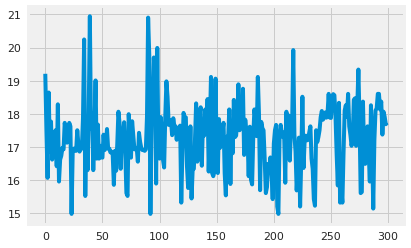

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.log(data['price'][:300]))

In [ ]:
data.groupby(['province_name','city']).agg({'price':['sum','mean','std']})

price                            
                                        sum          mean           std
province_name     city                                                 
Islamabad Capital Islamabad    541868627140  1.348100e+07  3.628306e+07
Punjab            Faisalabad    73485757580  8.093145e+06  1.592102e+07
                  Lahore      1142113480318  1.944486e+07  3.457283e+07
                  Rawalpindi   190355266408  8.313183e+06  1.550462e+07
Sindh             Karachi     1199932090726  1.983883e+07  3.830393e+07

<AxesSubplot:xlabel='price_bin', ylabel='count'>

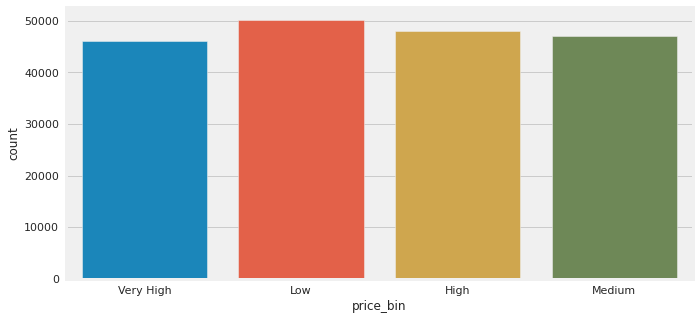

In [ ]:
sns.countplot(data['price_bin'])

<AxesSubplot:xlabel='city', ylabel='count'>

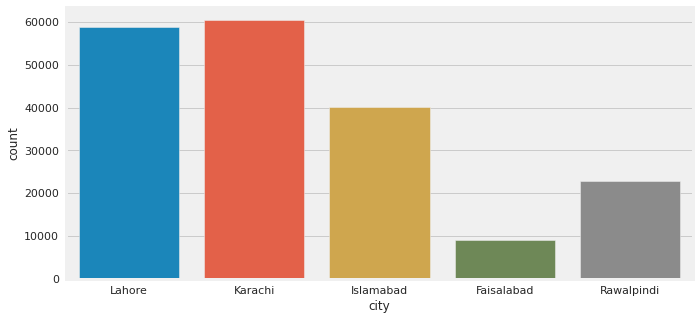

In [ ]:
sns.countplot(data['city'])

<AxesSubplot:xlabel='province_name', ylabel='count'>

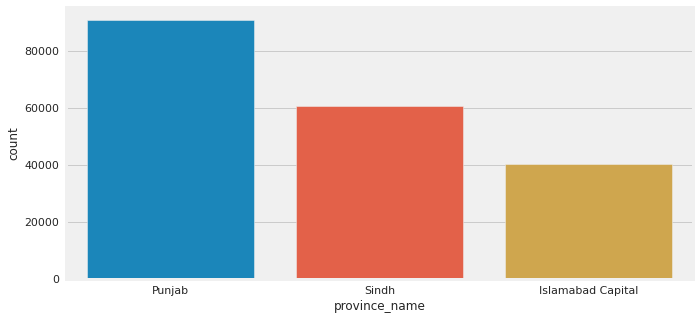

In [ ]:
sns.countplot(data['province_name'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

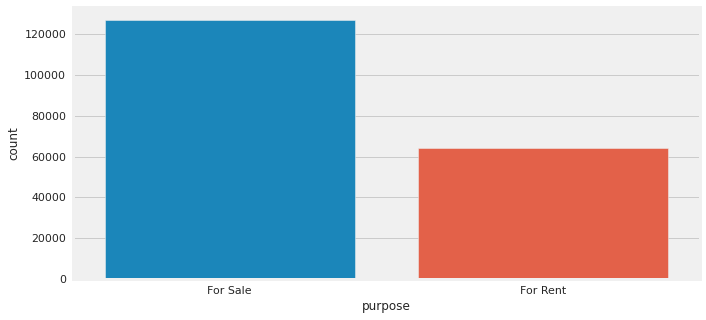

In [ ]:
sns.countplot(data['purpose'])

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])
data = data.reset_index()
data['date_added'] = data['date_added'].apply(lambda x: x.strftime('%Y-%m'))
data.head()

index  property_id  location_id  \
0      0       347795            8   
1      1       482892           48   
2      2       555962           75   
3      3       562843         3821   
4      4       686990         3522   

                                                                                                                                                    page_url  \
0                                           https://www.zameen.com/Property/lahore_model_town_6_kanal_excellent_house_for_sale_in_model_town-347795-8-1.html   
1                                                                 https://www.zameen.com/Property/lahore_multan_road_1_kanal_house_for_sale-482892-48-1.html   
2                                                                   https://www.zameen.com/Property/eden_eden_avenue_9_marla_house_for_sale-555962-75-1.html   
3                https://www.zameen.com/Property/gulberg_2_gulberg_2_block_s_semi_commercial_house_for_sale_near_mm_alam_price_negotiable-562843-3821-1.html   
4  https://www.zameen.com/Property/allama_iqbal_town_allama_iqbal_town_raza_block_11_marla_house_for_sale_at_best_location_with_noc_ready-686990-3522-1.html   

  property_type      price  price_bin           location    city  \
0         House  220000000  Very High         Model Town  Lahore   
1         House   40000000  Very High        Multan Road  Lahore   
2         House    9500000        Low               Eden  Lahore   
3         House  125000000  Very High            Gulberg  Lahore   
4         House   21000000       High  Allama Iqbal Town  Lahore   

  province_name  ... area_marla  area_sqft   purpose  bedrooms date_added  \
0        Punjab  ...      120.0   32670.12  For Sale         0    2019-07   
1        Punjab  ...       20.0    5445.02  For Sale         5    2018-10   
2        Punjab  ...        9.0    2450.26  For Sale         3    2019-07   
3        Punjab  ...       20.0    5445.02  For Sale         8    2019-04   
4        Punjab  ...       11.0    2994.76  For Sale         6    2019-04   

   year  month day                  agency                    agent  
0  2019      7  17  Real Biz International               Usama Khan  
1  2018     10   6             Khan Estate         mohsinkhan and B  
2  2019      7   3         Shahum Estate 2  Babar Hameed, Raja Omar  
3  2019      4   4                     NaN                      NaN  
4  2019      4   4                     NaN                      NaN  

[5 rows x 25 columns]

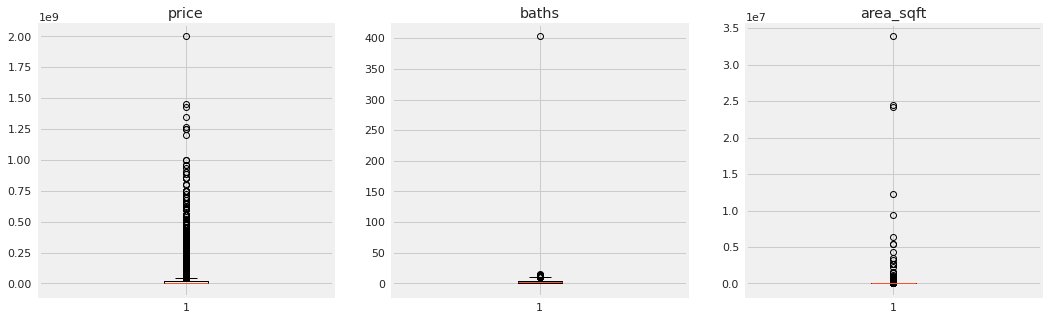

In [ ]:
show_graphs(data,['price','baths','area_sqft'])

In [ ]:
def remove_outlier(df, column_lst):
    df_in = df
    for col in column_lst:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_in = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_in
data = remove_outlier(data, ['price','baths','area_sqft'])

In [ ]:
data.head()

index  property_id  location_id  \
2       2       555962           75   
4       4       686990         3522   
6       6       891543         4031   
10     10      1286643         3733   
12     12      1407045         4135   

                                                                                                                                                                                                                                                                                                                                                                                  page_url  \
2                                                                                                                                                                                                                                                                                                 https://www.zameen.com/Property/eden_eden_avenue_9_marla_house_for_sale-555962-75-1.html   
4                                                                                                                                                                                                                                https://www.zameen.com/Property/allama_iqbal_town_allama_iqbal_town_raza_block_11_marla_house_for_sale_at_best_location_with_noc_ready-686990-3522-1.html   
6   https://www.zameen.com/Property/military_accounts_housing_society_military_accounts_society_block_b_brand_new_8_marla_luxurious_house_for_sale_at_military_accounts_cooperative_hosing_society_phase_1_college_road_lahore_key_features_of_this_luxurious_house_are__6_bedrooms_with_attach_bath__powder_room__2_kitchens__2_tv_lounges__drawing_and_dining_room__c-891543-4031-1.html   
10                                                                                                                                                                                                                                                                https://www.zameen.com/Property/eden_eden_palace_villas_7_5_marla_luxury_house_is_available_for_sale-1286643-3733-1.html   
12                                                                                                                                                                                                                                 https://www.zameen.com/Property/park_view_villas_park_view_villas_jade_block_5_marla_house__for_sale_in_park_view_villas_jade_block-1407045-4135-1.html   

   property_type     price price_bin                           location  \
2          House   9500000       Low                               Eden   
4          House  21000000      High                  Allama Iqbal Town   
6          House  16500000      High  Military Accounts Housing Society   
10         House  13500000    Medium                               Eden   
12         House   8500000       Low                   Park View Villas   

      city province_name  ... area_marla  area_sqft   purpose  bedrooms  \
2   Lahore        Punjab  ...        9.0    2450.26  For Sale         3   
4   Lahore        Punjab  ...       11.0    2994.76  For Sale         6   
6   Lahore        Punjab  ...        8.0    2178.01  For Sale         6   
10  Lahore        Punjab  ...        7.5    2041.88  For Sale         4   
12  Lahore        Punjab  ...        5.0    1361.25  For Sale         4   

   date_added  year  month day           agency                    agent  
2     2019-07  2019      7   3  Shahum Estate 2  Babar Hameed, Raja Omar  
4     2019-04  2019      4   4              NaN                      NaN  
6     2019-07  2019      7   3              NaN                      NaN  
10    2019-04  2019      4   4              NaN                      NaN  
12    2019-07  2019      7  22              NaN                      NaN  

[5 rows x 25 columns]

In [ ]:
data.columns

Index(['index', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

## Feature Engeenering

In [ ]:
data['price_per_sqft'] = data['price']/data['area_sqft']

In [ ]:
data = remove_outlier(data, ['price_per_sqft'])

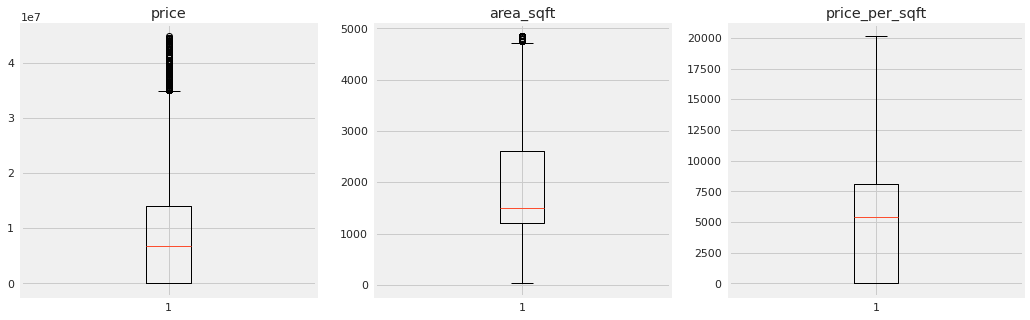

In [ ]:
show_graphs(data,['price', 'area_sqft', 'price_per_sqft'])

## All Data Analysis

Shape of your Data Set loaded: (148654, 26)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    26 Predictors classified...
        2 variables removed since they were ID or low-information variables
        List of variables removed: ['index', 'property_id']
Number of All Scatter Plots = 15


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

All Plots done
Time to run AutoViz = 352 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


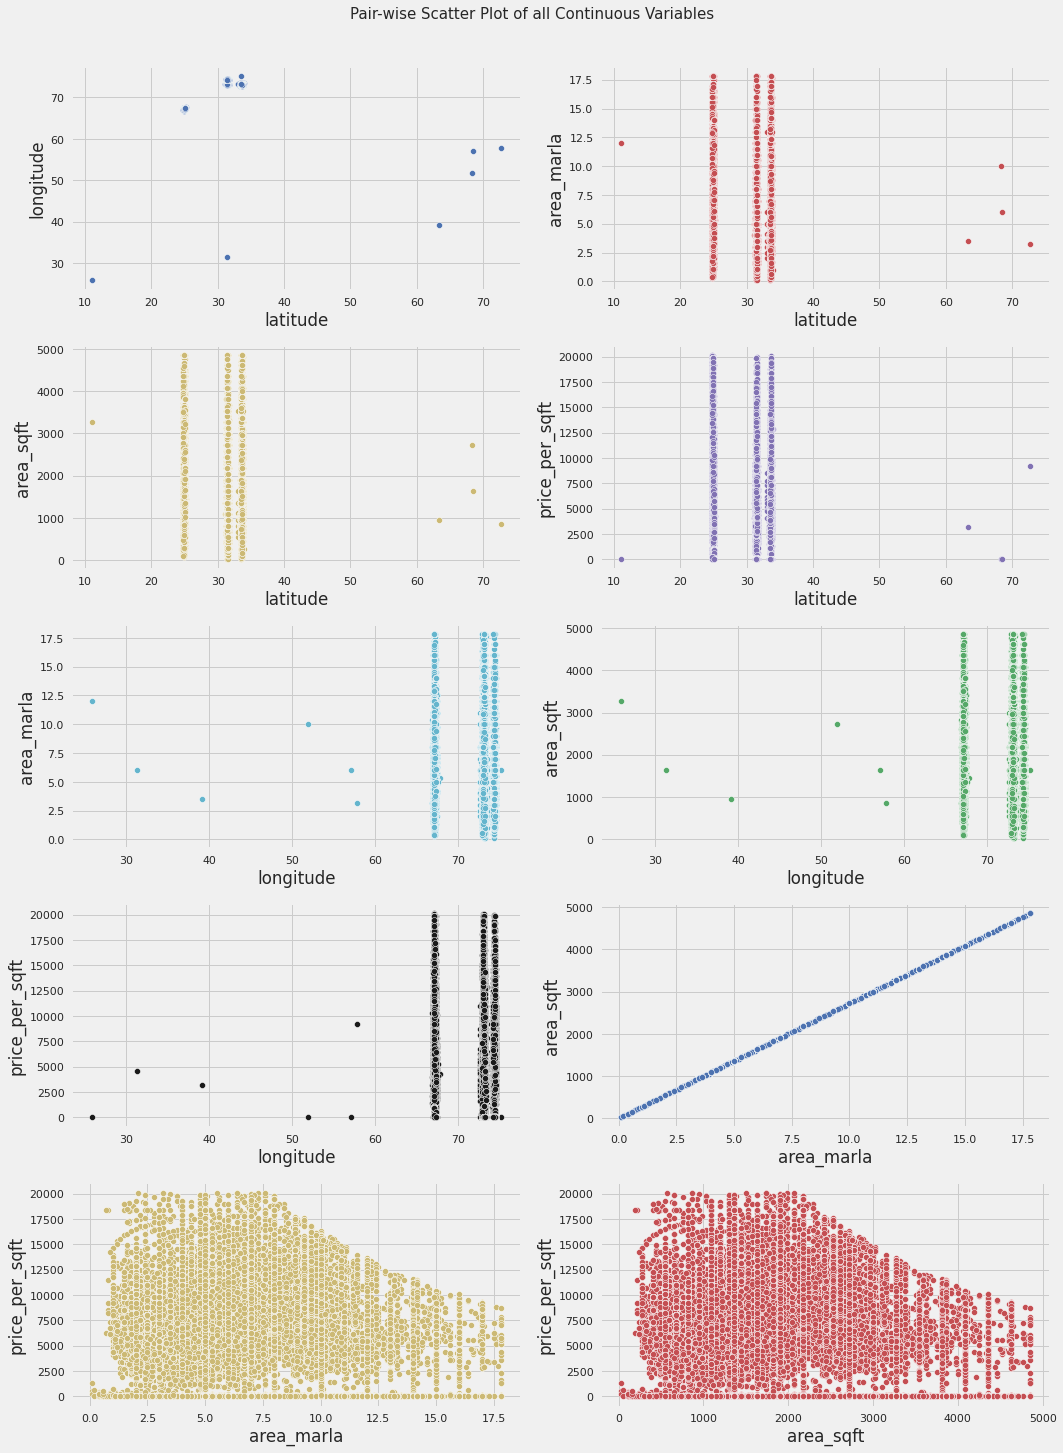

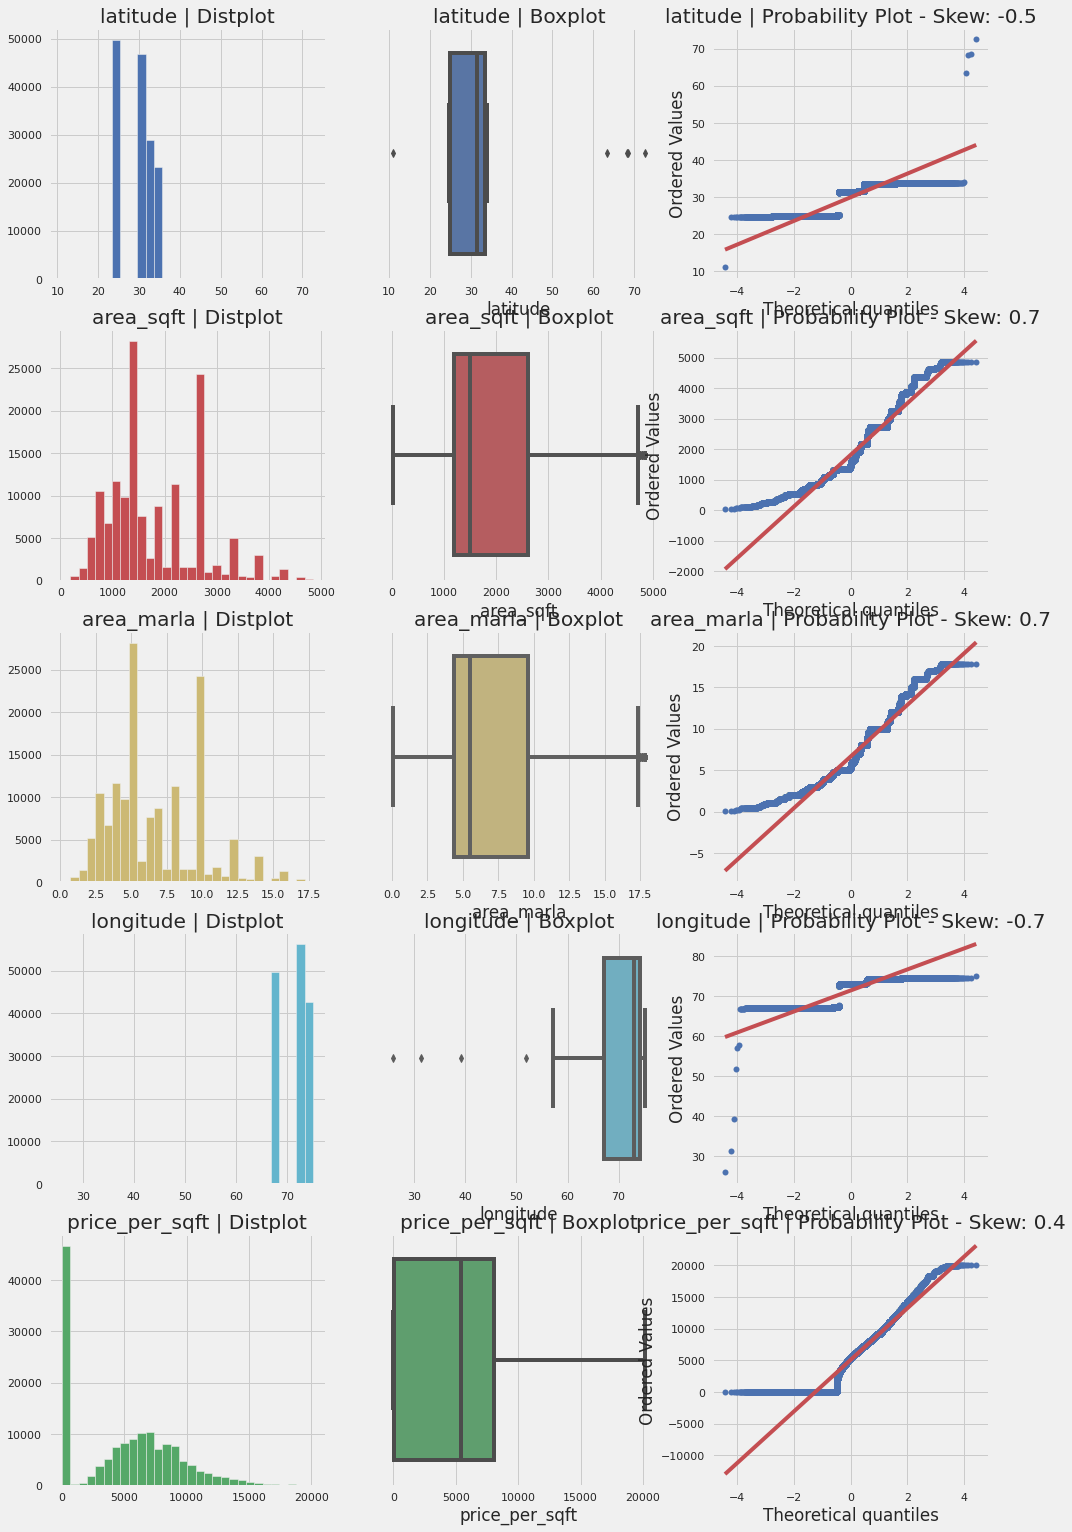

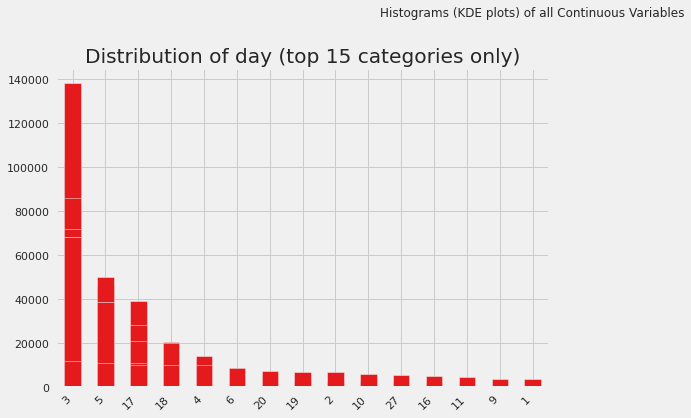

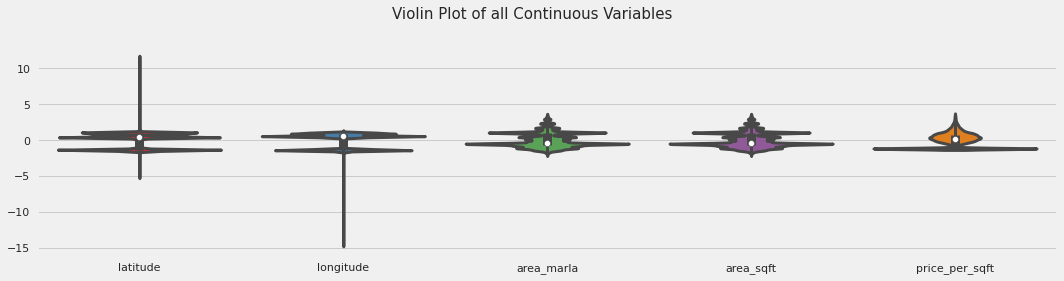

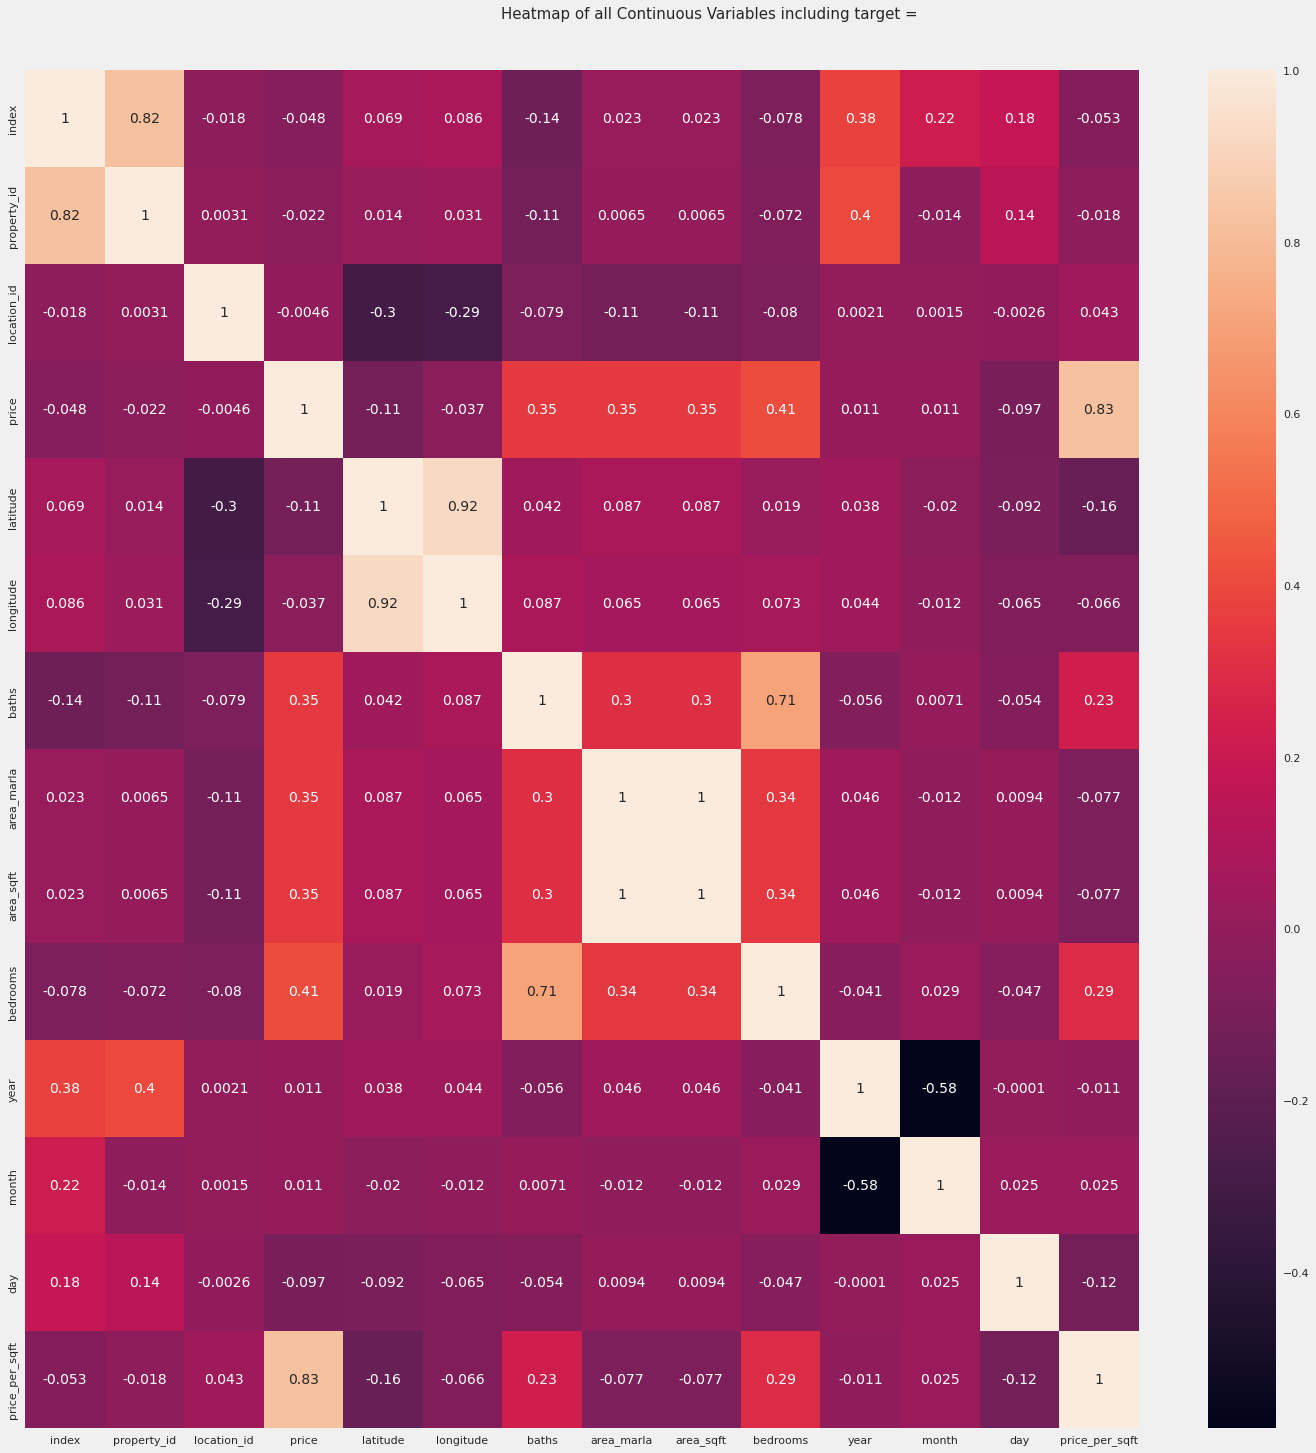

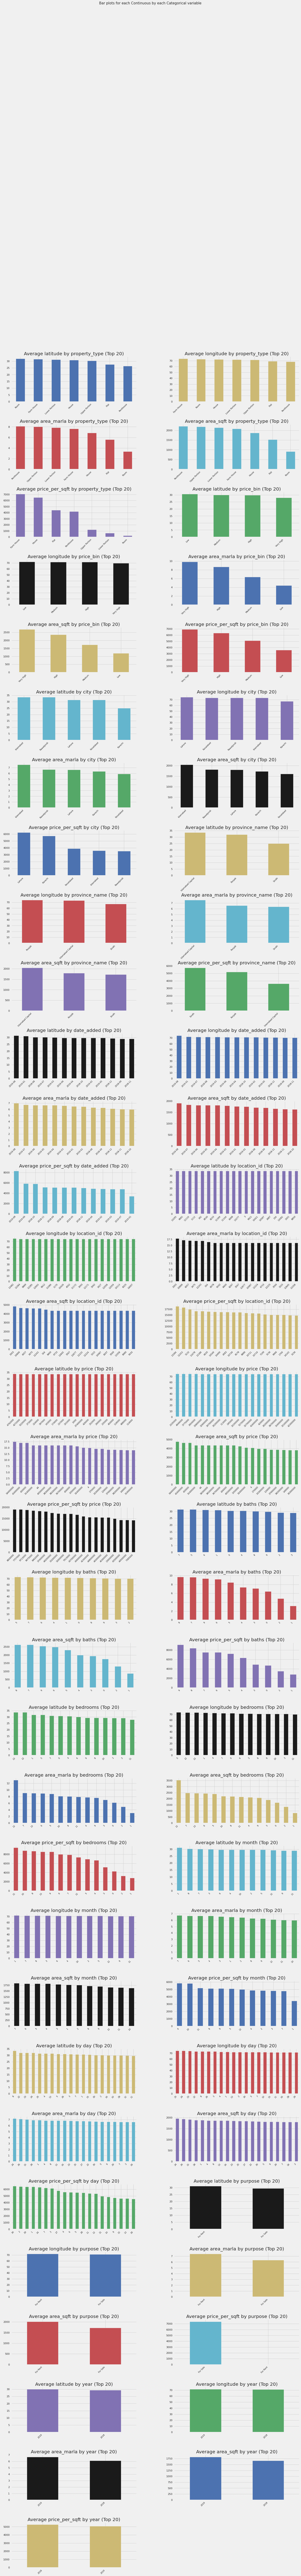

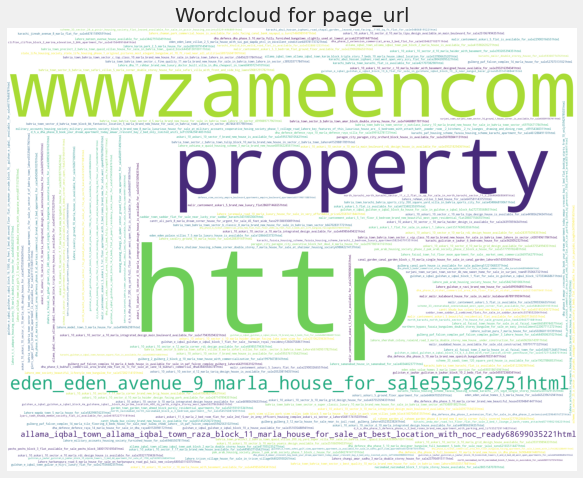

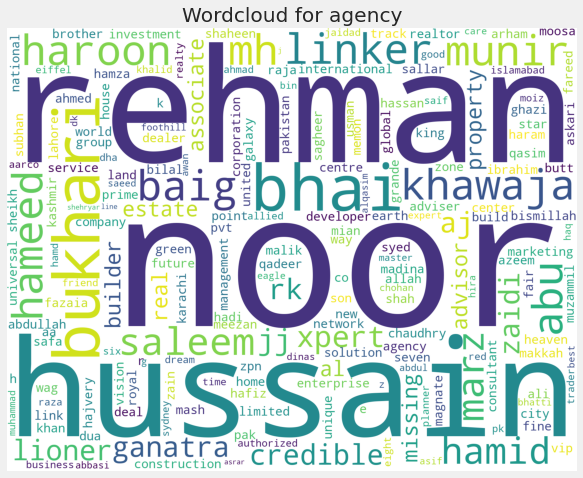

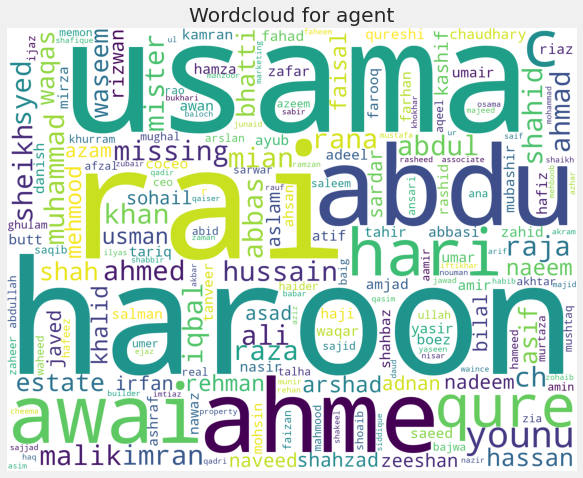

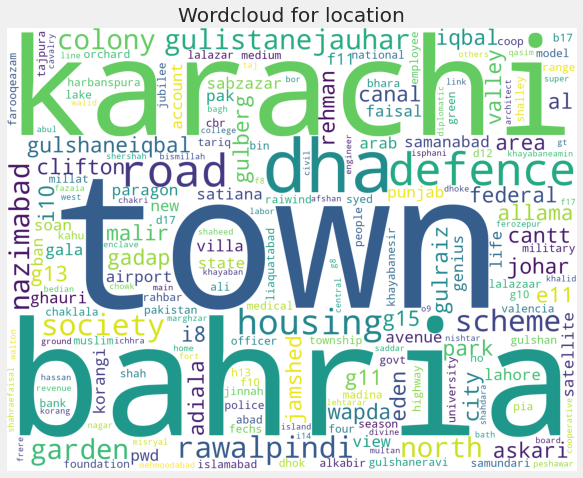

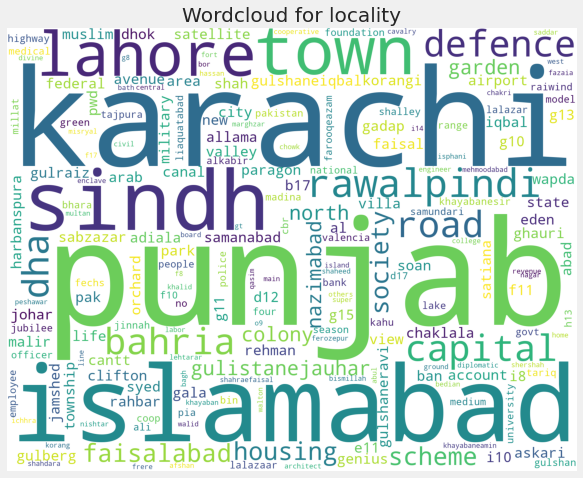

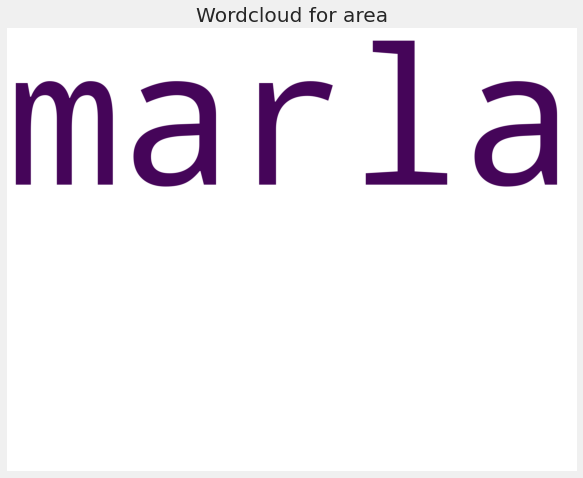

In [ ]:
data.to_csv("df.csv",index=False)
autoviz = AutoViz_Class().AutoViz('df.csv')

In [ ]:
# Remove outliers
index = data[(data['baths']==0) & (data['bedrooms']>1)].index
df5 = data.drop(index) 

index = df5[(df5['property_type']=='Room') & ((df5['baths']>1) | (df5['bedrooms']>1))].index
df6 = df5.drop(index)

index = df6[(df6['bedrooms']==0)].index
df7 = df6.drop(index)

index = df7[((df7['bedrooms'])+3)<df7['baths']].index
df8 = df7.drop(index)

In [ ]:
#Remove outliers from Square Feet, Bedrooms and bathrooms
def remove_outliers(df,p_type,area,bedrooms,baths):
    sqft = np.sort(df[area].unique())
    for sq in sqft:
        rooms = int(((0.5*sq)/171)+2)
        df.loc[(df[p_type]!='Room') & (df[area]==sq) & (df[bedrooms]>rooms), [bedrooms]] = rooms
        df.loc[(df[p_type]!='Room') & (df[area]==sq) & (df[baths]>(rooms+2)), [baths]] = rooms+2

remove_outliers(df8,'property_type','area_sqft','bedrooms','baths')

In [ ]:
#The available data includes both selling and renting items, but I'm only interested in selling items because buyers are aware of the true value of homes, flats, and other properties based on location and rooms.
#That's why i drop the Rental Rows and save into df9 
index = df8[df8['purpose']=='For Rent'].index
df9 = df8.drop(index)

#Since there are so many outliers in the price_bin column, it should be removed.
df10 = df9.drop(['price_bin'], axis='columns')

#Add a price_bin column based on this criterion.
df10['price_bin'] = 'Low'
df10.loc[(df10['price']>2500000) & (df10['price']<=5000000),['price_bin']] = 'Medium'
df10.loc[(df10['price']>5000000) & (df10['price']<=10000000),['price_bin']] = 'High'
df10.loc[(df10['price']>10000000),['price_bin']] = 'Very High'

#Drop below 50 thousand price rows
df11 = df10[df10['price']>50000]

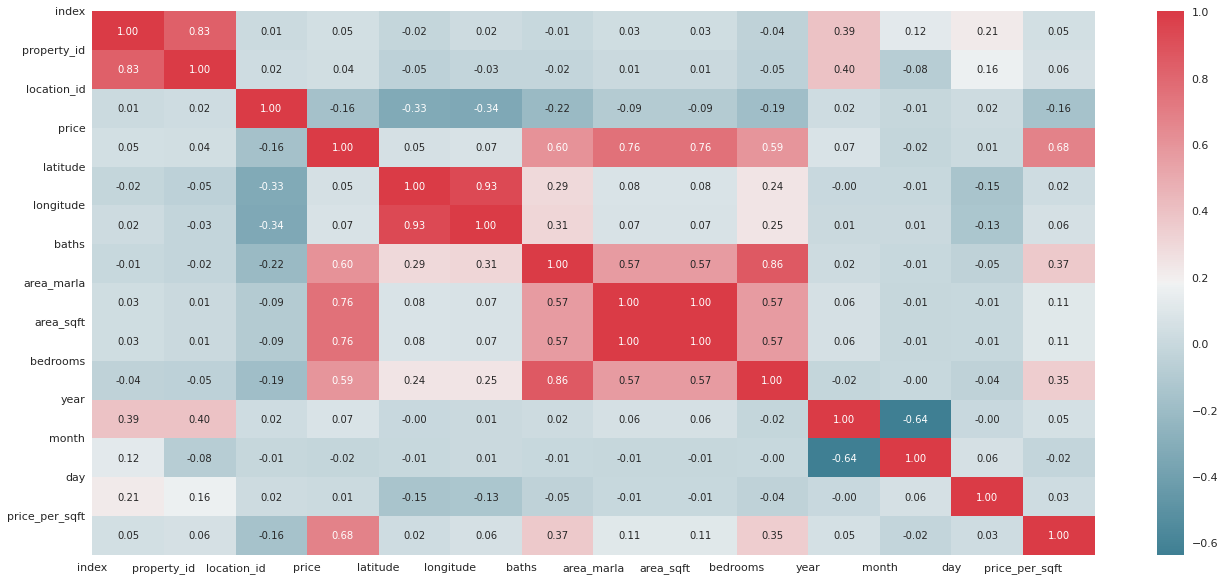

In [ ]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(20, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
heatMap(df11)

In [ ]:
dummy1 = pd.get_dummies(df11.property_type)
dummy2 = pd.get_dummies(df11.price_bin)
dummy3 = pd.get_dummies(df11.location)
dummy4 = pd.get_dummies(df11.city)
dummy5 = pd.get_dummies(df11.province_name)

df12 = pd.concat([df11.drop(['property_type','price_bin','location','latitude','longitude','city','province_name','purpose',
                             'date_added','year','month','day'], axis='columns'),dummy1,dummy2,dummy3,dummy4,dummy5],axis='columns')
df12.sample(5)

index  property_id  location_id  \
25754    25754     13338941         3233   
19324    19324     12564482          232   
127318  127318     17053825         3226   
14846    14846     11808749        11987   
15111    15111     12005525         3069   

                                                                                                                                                                                                     page_url  \
25754                                                                                                                         https://www.zameen.com/Property/e_11_e_11_2_house_for_sale-13338941-3233-1.html   
19324                                                                            https://www.zameen.com/Property/karachi_gulistan_e_jauhar_american_architect_designed_apartment_for_sale-12564482-232-1.html   
127318                                                                                                 https://www.zameen.com/Property/dha_valley_dha_homes_8_marla_lilly_block_for_sale-17053825-3226-1.html   
14846                                     https://www.zameen.com/Property/bahria_enclave_bahria_enclave_sector_c1_brand_new_house_is_available_for_sale_in_bahria_enclave_with_basement-11808749-11987-1.html   
15111   https://www.zameen.com/Property/bahria_town_phase_8_safari_valley_bahria_town_phase_8_abu_bakar_block_8_marla_house_main_boulevard_abu_bakar_avenue_bahria_town_phase_8_for_sale-12005525-3069-1.html   

           price                                    locality  baths  \
25754   20000000          E-11, Islamabad, Islamabad Capital      3   
19324   13500000           Gulistan-e-Jauhar, Karachi, Sindh      3   
127318   7450000   DHA Defence, Islamabad, Islamabad Capital      3   
14846   31500000   Bahria Town, Islamabad, Islamabad Capital      6   
15111   15000000  Bahria Town Rawalpindi, Rawalpindi, Punjab      5   

             area  area_marla  area_sqft  ...  Zulfiqar Colony circular road  \
25754     5 Marla         5.0    1361.25  ...                0             0   
19324   6.7 Marla         6.7    1824.08  ...                0             0   
127318    8 Marla         8.0    2178.01  ...                0             0   
14846    10 Marla        10.0    2722.51  ...                0             0   
15111     7 Marla         7.0    1905.76  ...                0             0   

       Faisalabad  Islamabad  Karachi  Lahore  Rawalpindi  Islamabad Capital  \
25754           0          1        0       0           0                  1   
19324           0          0        1       0           0                  0   
127318          0          1        0       0           0                  1   
14846           0          1        0       0           0                  1   
15111           0          0        0       0           1                  0   

        Punjab  Sindh  
25754        0      0  
19324        0      1  
127318       0      0  
14846        0      0  
15111        1      0  

[5 rows x 1374 columns]

## Preprocessing

In [ ]:
df12.drop(columns=['index','property_id','location_id'],inplace=True)

In [ ]:
df12.drop(columns=['page_url'],inplace=True)

In [ ]:
df12.drop(columns=['locality'],inplace=True)

In [ ]:
df12.head()

price  baths       area  area_marla  area_sqft  bedrooms  \
4   21000000      5   11 Marla        11.0    2994.76         6   
6   16500000      7    8 Marla         8.0    2178.01         6   
10  13500000      4  7.5 Marla         7.5    2041.88         4   
12   8500000      4    5 Marla         5.0    1361.25         4   
15  23500000      4   10 Marla        10.0    2722.51         4   

               agency              agent  price_per_sqft  Farm House  ...  \
4                 NaN                NaN     7012.248060           0  ...   
6                 NaN                NaN     7575.722793           0  ...   
10                NaN                NaN     6611.554058           0  ...   
12                NaN                NaN     6244.260790           0  ...   
15  Forces Properties  Khalid Saeed Khan     8631.740563           0  ...   

    Zulfiqar Colony  circular road  Faisalabad  Islamabad  Karachi  Lahore  \
4                 0              0           0          0        0       1   
6                 0              0           0          0        0       1   
10                0              0           0          0        0       1   
12                0              0           0          0        0       1   
15                0              0           0          0        0       1   

    Rawalpindi  Islamabad Capital  Punjab  Sindh  
4            0                  0       1      0  
6            0                  0       1      0  
10           0                  0       1      0  
12           0                  0       1      0  
15           0                  0       1      0  

[5 rows x 1369 columns]

In [ ]:
df12['area(in marla)']=data['area'].apply(lambda x: float(x.split(' ')[0]))

In [ ]:
df12.head()

price  baths       area  area_marla  area_sqft  bedrooms  \
4   21000000      5   11 Marla        11.0    2994.76         6   
6   16500000      7    8 Marla         8.0    2178.01         6   
10  13500000      4  7.5 Marla         7.5    2041.88         4   
12   8500000      4    5 Marla         5.0    1361.25         4   
15  23500000      4   10 Marla        10.0    2722.51         4   

               agency              agent  price_per_sqft  Farm House  ...  \
4                 NaN                NaN     7012.248060           0  ...   
6                 NaN                NaN     7575.722793           0  ...   
10                NaN                NaN     6611.554058           0  ...   
12                NaN                NaN     6244.260790           0  ...   
15  Forces Properties  Khalid Saeed Khan     8631.740563           0  ...   

    circular road  Faisalabad  Islamabad  Karachi  Lahore  Rawalpindi  \
4               0           0          0        0       1           0   
6               0           0          0        0       1           0   
10              0           0          0        0       1           0   
12              0           0          0        0       1           0   
15              0           0          0        0       1           0   

    Islamabad Capital  Punjab  Sindh  area(in marla)  
4                   0       1      0            11.0  
6                   0       1      0             8.0  
10                  0       1      0             7.5  
12                  0       1      0             5.0  
15                  0       1      0            10.0  

[5 rows x 1370 columns]

In [ ]:
df12.drop(columns=['area'],inplace=True)

In [ ]:
df12.head()

price  baths  area_marla  area_sqft  bedrooms             agency  \
4   21000000      5        11.0    2994.76         6                NaN   
6   16500000      7         8.0    2178.01         6                NaN   
10  13500000      4         7.5    2041.88         4                NaN   
12   8500000      4         5.0    1361.25         4                NaN   
15  23500000      4        10.0    2722.51         4  Forces Properties   

                agent  price_per_sqft  Farm House  Flat  ...  circular road  \
4                 NaN     7012.248060           0     0  ...              0   
6                 NaN     7575.722793           0     0  ...              0   
10                NaN     6611.554058           0     0  ...              0   
12                NaN     6244.260790           0     0  ...              0   
15  Khalid Saeed Khan     8631.740563           0     0  ...              0   

    Faisalabad  Islamabad  Karachi  Lahore  Rawalpindi  Islamabad Capital  \
4            0          0        0       1           0                  0   
6            0          0        0       1           0                  0   
10           0          0        0       1           0                  0   
12           0          0        0       1           0                  0   
15           0          0        0       1           0                  0   

    Punjab  Sindh  area(in marla)  
4        1      0            11.0  
6        1      0             8.0  
10       1      0             7.5  
12       1      0             5.0  
15       1      0            10.0  

[5 rows x 1369 columns]

In [ ]:
Data=df12.dropna()

In [ ]:
Data.head()

price  baths  area_marla  area_sqft  bedrooms             agency  \
15  23500000      4        10.0    2722.51         4  Forces Properties   
19  27500000      5        12.0    3267.01         4  Forces Properties   
24  21200000      4        10.0    2722.51         3  Forces Properties   
25  23000000      5        10.0    2722.51         4  Forces Properties   
26  21500000      5        10.0    2722.51         4  Forces Properties   

                agent  price_per_sqft  Farm House  Flat  ...  circular road  \
15  Khalid Saeed Khan     8631.740563           0     0  ...              0   
19  Khalid Saeed Khan     8417.482652           0     0  ...              0   
24  Khalid Saeed Khan     7786.931912           0     0  ...              0   
25  Khalid Saeed Khan     8448.086508           0     0  ...              0   
26  Khalid Saeed Khan     7897.124345           0     0  ...              0   

    Faisalabad  Islamabad  Karachi  Lahore  Rawalpindi  Islamabad Capital  \
15           0          0        0       1           0                  0   
19           0          0        0       1           0                  0   
24           0          0        0       1           0                  0   
25           0          0        0       1           0                  0   
26           0          0        0       1           0                  0   

    Punjab  Sindh  area(in marla)  
15       1      0            10.0  
19       1      0            12.0  
24       1      0            10.0  
25       1      0            10.0  
26       1      0            10.0  

[5 rows x 1369 columns]

In [ ]:
Data.drop(columns=['agency','agent'],inplace=True)

In [ ]:
Data.head()

price  baths  area_marla  area_sqft  bedrooms  price_per_sqft  \
15  23500000      4        10.0    2722.51         4     8631.740563   
19  27500000      5        12.0    3267.01         4     8417.482652   
24  21200000      4        10.0    2722.51         3     7786.931912   
25  23000000      5        10.0    2722.51         4     8448.086508   
26  21500000      5        10.0    2722.51         4     7897.124345   

    Farm House  Flat  House  Lower Portion  ...  circular road  Faisalabad  \
15           0     0      1              0  ...              0           0   
19           0     0      1              0  ...              0           0   
24           0     0      1              0  ...              0           0   
25           0     0      1              0  ...              0           0   
26           0     0      1              0  ...              0           0   

    Islamabad  Karachi  Lahore  Rawalpindi  Islamabad Capital  Punjab  Sindh  \
15          0        0       1           0                  0       1      0   
19          0        0       1           0                  0       1      0   
24          0        0       1           0                  0       1      0   
25          0        0       1           0                  0       1      0   
26          0        0       1           0                  0       1      0   

    area(in marla)  
15            10.0  
19            12.0  
24            10.0  
25            10.0  
26            10.0  

[5 rows x 1367 columns]

In [ ]:
Data.reset_index(inplace=True)
Data.head()

index     price  baths  area_marla  area_sqft  bedrooms  price_per_sqft  \
0     15  23500000      4        10.0    2722.51         4     8631.740563   
1     19  27500000      5        12.0    3267.01         4     8417.482652   
2     24  21200000      4        10.0    2722.51         3     7786.931912   
3     25  23000000      5        10.0    2722.51         4     8448.086508   
4     26  21500000      5        10.0    2722.51         4     7897.124345   

   Farm House  Flat  House  ...  circular road  Faisalabad  Islamabad  \
0           0     0      1  ...              0           0          0   
1           0     0      1  ...              0           0          0   
2           0     0      1  ...              0           0          0   
3           0     0      1  ...              0           0          0   
4           0     0      1  ...              0           0          0   

   Karachi  Lahore  Rawalpindi  Islamabad Capital  Punjab  Sindh  \
0        0       1           0                  0       1      0   
1        0       1           0                  0       1      0   
2        0       1           0                  0       1      0   
3        0       1           0                  0       1      0   
4        0       1           0                  0       1      0   

   area(in marla)  
0            10.0  
1            12.0  
2            10.0  
3            10.0  
4            10.0  

[5 rows x 1368 columns]

In [ ]:
Data.drop(columns=['index'],inplace=True)
Data.head()

price  baths  area_marla  area_sqft  bedrooms  price_per_sqft  \
0  23500000      4        10.0    2722.51         4     8631.740563   
1  27500000      5        12.0    3267.01         4     8417.482652   
2  21200000      4        10.0    2722.51         3     7786.931912   
3  23000000      5        10.0    2722.51         4     8448.086508   
4  21500000      5        10.0    2722.51         4     7897.124345   

   Farm House  Flat  House  Lower Portion  ...  circular road  Faisalabad  \
0           0     0      1              0  ...              0           0   
1           0     0      1              0  ...              0           0   
2           0     0      1              0  ...              0           0   
3           0     0      1              0  ...              0           0   
4           0     0      1              0  ...              0           0   

   Islamabad  Karachi  Lahore  Rawalpindi  Islamabad Capital  Punjab  Sindh  \
0          0        0       1           0                  0       1      0   
1          0        0       1           0                  0       1      0   
2          0        0       1           0                  0       1      0   
3          0        0       1           0                  0       1      0   
4          0        0       1           0                  0       1      0   

   area(in marla)  
0            10.0  
1            12.0  
2            10.0  
3            10.0  
4            10.0  

[5 rows x 1367 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
features=list(Data.select_dtypes(['float']).columns)
features.append('price')
Data[features]=StandardScaler().fit_transform(Data[features])

## Machine Learning Models

## Random Forest

In [ ]:
X = Data.drop(['price'], axis='columns').values
y = Data.price.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0) 
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [ ]:
print(regressor.score(X_test,y_test))

0.9999869762540178


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,regressor.predict(X_test)))

1.2879015041328973e-05


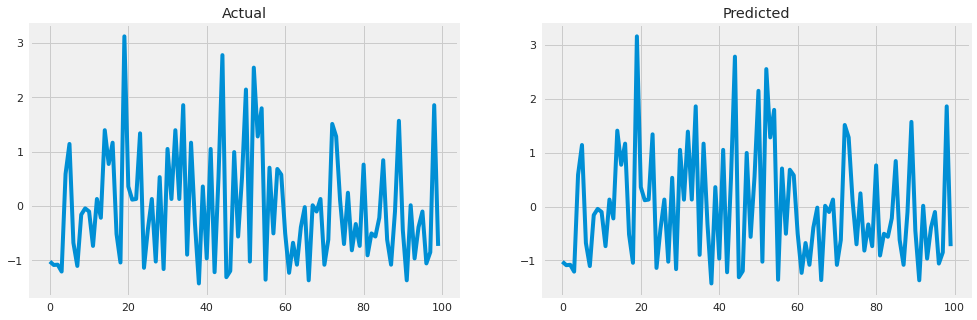

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1,2,1)
plt.plot(y_test[:100])
plt.title('Actual')
plt.subplot(1,2,2)
plt.plot(regressor.predict(X_test)[:100])
plt.title('Predicted')
plt.show()

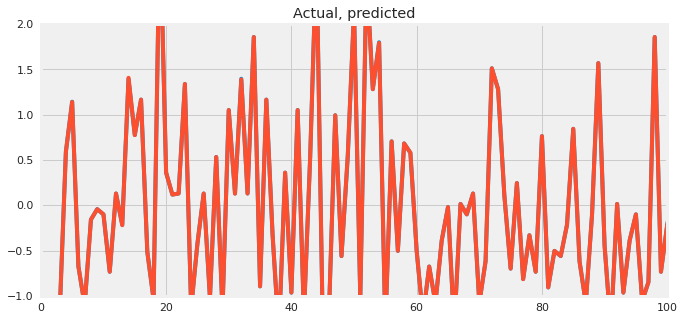

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.plot(y_test)
plt.plot(regressor.predict(X_test))
plt.title('Actual, predicted')
plt.axis([0,100,-1,2])
plt.show()